# Kastebevegelse
I denne øvinga skal vi studere kastebevegelse der vi tar hensyn til luftmotstand. 

## Bakgrunnsteori
### Prikk-notasjon for tidsderivert
En mye brukt notasjon for tidsderivasjon er "prikk": den deriverte av en størrelse $x$ med hensyn på tiden skrives $\dot{x}=\frac{dx}{dt}=x'(t)$ (leses "x prikk"). For andrederivert brukes to prikker: $\ddot{x}=\frac{d^2x}{dt^2}=x''(t)$ (leses "x dobbeltprikk").

Når vi kombinerer prikknotasjonen med definisjonene av posisjon $x(t)$, fart $v(t)$ og akselerasjon $a(t)$, får vi at

$$v(t)=\frac{dx}{dt}=\dot{x} \\
a(t)=\frac{dv}{dt}=\ddot{x}
$$

 
### Kastebevegelse uten luftmotstand (repetisjon)
Når vi så på kastebevegelse i kapittel 3, så vi bort fra luftmotstand, slik at kun tyngden virker. Newtons 2. lov uten luftmostand blir derfor

$$\begin{equation}
\sum \vec{F}=m\vec{a} =m\vec{g} \\
\vec{a}=\vec{g} \label{aks} \tag{1}
\end{equation}$$

[Bilde av koordinatsystem]

Legemets akselerasjon er altså lik tyngdeakselerasjonen $\vec{g}$. På komponentform gir $\eqref{aks}$ at
 
$$
\ddot{x}=0 \\
\ddot{y}=-g
$$

### Kastebevegelse med luftmotstand
Luftmotstand $\vec{F}_D$ er en kraft som er proporsjonal med kvadratet av farten, og som har motsatt retning av farten: 

$$\vec{F}_D=-kv^2 \hat{v} \\
=-kv\vec{v}$$

Her er $\vec{v}=[\dot{x},\dot{y}]$, slik at $v=\left| \vec{v} \right| =\sqrt{\dot{x}^2+\dot{y}^2}$.

Newtons 2. lov med luftmostand

$$\sum \vec{F}=m\vec{a} =-m\vec{g}-kv\vec{v}$$

På komponentform

$$
\begin{equation}
\ddot{x}=-\frac{k}{m}v\dot{x} \\
\ddot{y}=-g-\frac{k}{m}v\dot{y} \label{difflikn} \tag{2}
\end{equation}$$

Dette er et system av to koblede differensiallikninger for de ukjente funksjonene $x(t)$ og $y(t)$.

### Løse differensiallikninger i Python
Vi skal bruke funksjonen <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">```solve_ivp```</a> fra Python-bibliolteket *scipy* til å løse differensiallikningsystemet $\eqref{difflikn}$, med startbetingelsene $x(0)=y(0)=0$, samt $\vec{v}(0)=\vec{v}_0$. 

Når vi løser differensiallikninger for $x(t)$ og $y(t)$ numerisk, deler vi inn tidsintervallet i diskrete "tidssteg" $h$ fra starttid $t_0$ til sluttid $t_1$, $[t_0,t_0+h,t_0+2h,...,t_1]$. Ved hvert tidspunkt $t_n$ er legemets posisjon og fart hhv. $[x_n,y_n]$ og $[\dot{x}_n,\dot{y}_n]$, som kan samles i en vektor $\vec{w}_n=[x_n,y_n,\dot{x}_n,\dot{y}_n]$. 

[Figur med kastebevegelse og variable]

"Bak kulissene" bruker ```solve_ivp``` verdiene i $\vec{w}_n$ til å beregne $\vec{w}_{n+1}$, med fast eller variabel steglengde $h$. For å kunne bruke ```solve_ivp```, må vi skrive $\eqref{difflikn}$ som et system av 1. ordens differensiallikninger. Vi innfører derfor to nye funksjoner $u_1(t)$ og $u_2(t)$, slik at $\eqref{difflikn}$ får ønsket form:

$$u_1 = \dot{x} \Rightarrow \dot{u_1}=\ddot{x} \\
u_2 = \dot{y} \Rightarrow \dot{u_2}=\ddot{y}
$$

"Posisjons- og fartsvektoren" $\vec{w}$ kan da skrives $\vec{w}=[x,y,\dot{x},\dot{y}]=[x,y,u_1,u_2]$. Sammen med $\eqref{difflikn}$ får vi da følgende system med 4 koblede, 1. ordens differensiallikninger:

$$
\begin{equation}
u_1=\dot{x} \\
u_2=\dot{y} \\
\dot{u_1}=-\frac{k}{m}v u_1 \\
\dot{u_2}=-g-\frac{k}{m}v u_2 \label{difflikn2} \tag{3}
\end{equation} 
$$

```solve_ivp``` forutsetter at systemet $\eqref{difflikn2}$ skrives på en bestemt form:  

$$
\dot{\vec{w}}=f(\vec{w}),$$

der funksjonen $$f(\vec{w})=f \left(
\begin{bmatrix}
    x \\ y \\ u_1 \\ u_2
\end{bmatrix} \right ) = \begin{bmatrix}
    u_1 \\ u_2 \\ -\frac{k}{m}v u_1 \\ -g-\frac{k}{m}v u_2
\end{bmatrix} $$





## Oppgaver
a) Tegn grafer som viser banen for tre ulike vinkler, med og uten luftmotstand.
<br>
b) Finn optimal utskytingsvinkel for gitt legeme.
<br>

## Ferdig kode
Den ferdige koden bruker ```solve_ivp``` til å løse differensiallikningssystemet. 

In [16]:
#Importerer bibliotek
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Sett standard parametre for plotting av grafer
figparam = {'figure.figsize': (15, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(figparam)

#Konstanter
g=9.81
m=1.0 #Legemets masse
rho=1.2 #Massetettheten til luft i kg/m^3
A=0.1 #Legemets frontareal, til beregning av luftmotstand
C_d=0.7 #Legemets "drag coefficient"
k=0.5*rho*A*C_d #Proporsjonalitetskonstanten for luftmotstanden, F_D = kv^2

def f(t,w): 
    """f(t,w) er en vektorfunksjon som definerer høyresiden i differensiallikningssystemet, som skrives på formen
    
    d/dt(w_vektor)=f(w_vektor).
    
    Her er w=[x,y,u1,u2] med u1=dx/dt og u2=dy/dt, slik at
    
    d/dt([x,y,u1,u2])=[u,v,-k/m*v*u1,-k/m*v*u2]
    
    Funksjonen f må ha med t som inputparameter selv om likningene ikke har eksplisitt tidsavhengighet.

    """
    v=(w[2]**2+w[3]**2)**(0.5) #Beregner farten i punktet
    
    return (w[2],w[3],-(k/m)*v*w[2],-g-(k/m)*v*w[3])

def treff_bakken(t,w): #Funksjon som bestemmer om legemet har truffet bakken i y = 0
        return w[1] #y-verdi sendes til solver, som sjekker om betingelsen y=0 er oppfylt
treff_bakken.terminal=True #Når egenskapen settes til True, avbrytes integrasjonen  

def initialiser_vektor(x0,y0,theta,v0): #Vektor med legemets startposisjon (x0,y0), utgangsvinkel theta og startfart v0
    w=np.zeros(4)
    w[0]=x0
    w[1]=y0
    w[2]=v0*np.cos(np.deg2rad(theta))
    w[3]=v0*np.sin(np.deg2rad(theta))
    return w
    
def posisjon_fart(f,w,t0,t1,h): #Bruker solve_ivp over et tidsintervall [t0,t1], til å gi en løsning [x(t),y(t),v_x(t),v_y(t)]
    t_eval=np.arange(t0,t1,h) #Spesifiserer t-verdier der vi ønsker at løsninger for x(t) og y(t) beregnes
    sol = solve_ivp(f,(t0,t1) , w,t_eval=t_eval,events=[treff_bakken])
    return sol

    

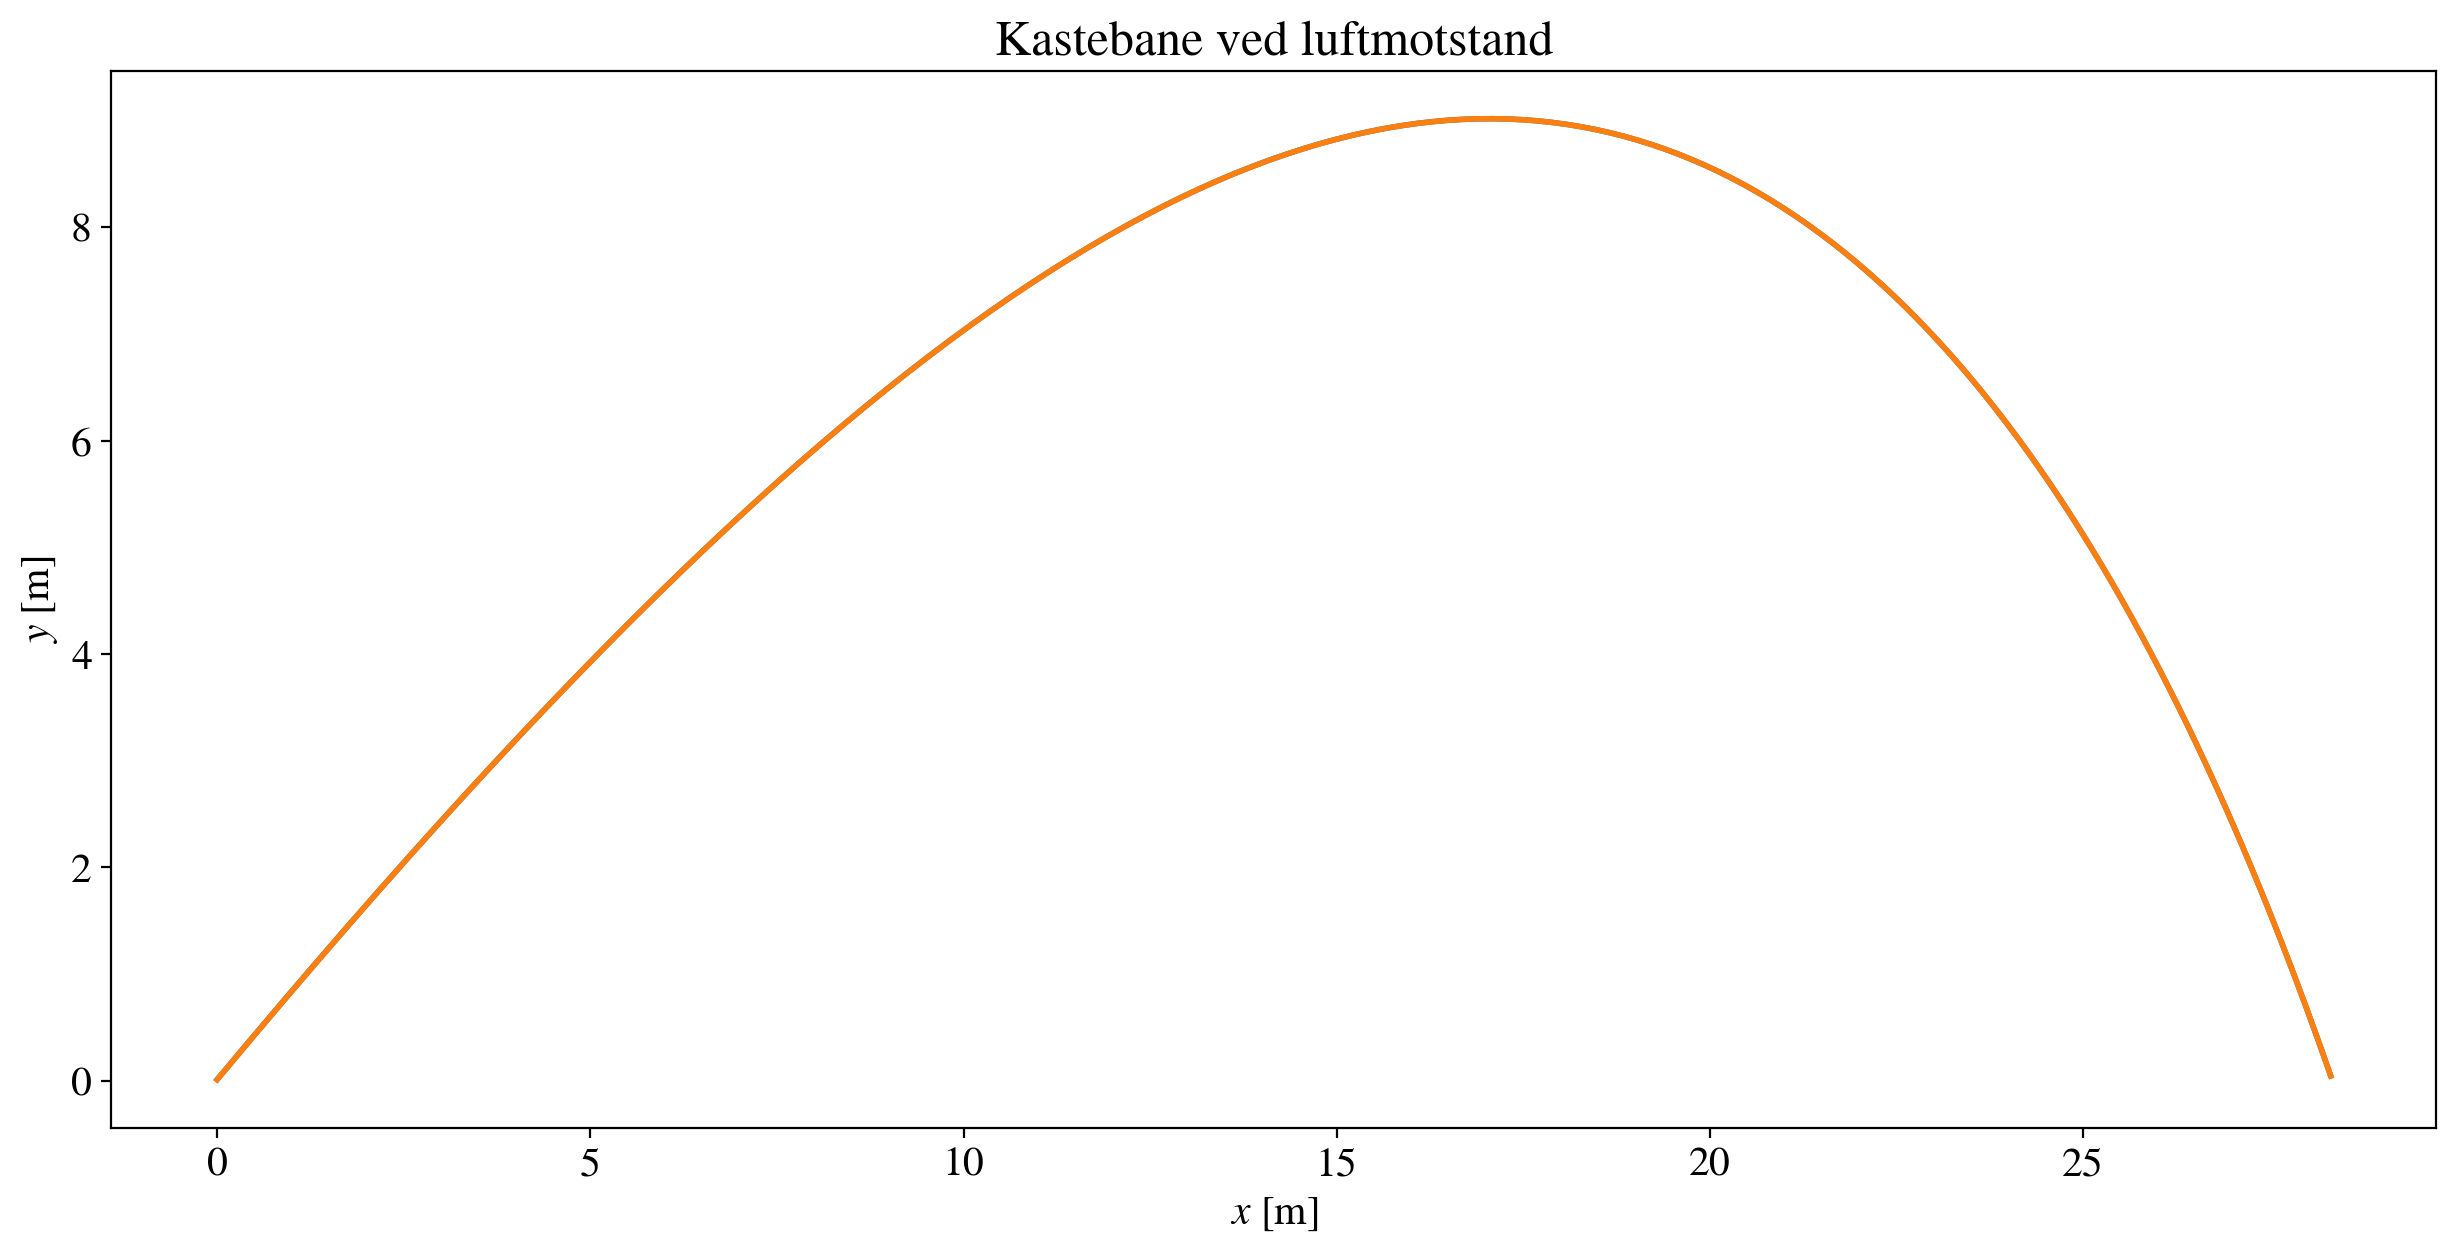

In [21]:
w=initialiser_vektor(0,0.01,40,30)
bane=posisjon_fart(f,w,0,3.0,0.01)
#print(bane2)
plt.plot(bane.y[0], bane.y[1])

baneplot=plt.subplot()
baneplot.set_title("Kastebane ved luftmotstand")
baneplot.set_xlabel(r"$x$ [m]")
baneplot.set_ylabel(r"$y$ [m]")
baneplot.plot(bane.y[0],bane.y[1])
plt.show()